In [1]:
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyIEEM.models.utils import initialize_SIR

In [141]:
country = 'SWE'
spatial = True
age_classes = pd.IntervalIndex.from_tuples([(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35),(35,40),(40,45),(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80),(80,120)], closed='left')

In [144]:
model = initialize_SIR(country, age_classes, spatial=spatial, contact_type='absolute_contacts')

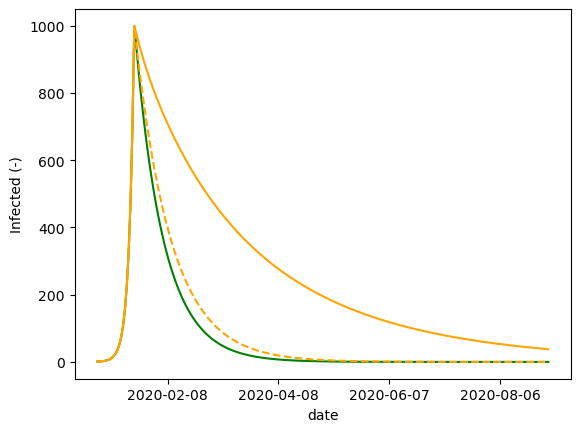

In [145]:
fig,ax = plt.subplots()

# economic lockdown, schools closed, preventive measures, social restrictions
out = model.sim(['2020-01-01', '2020-09-01'])
ax.plot(out.date, out.I.sum(dim=['age_class', 'spatial_unit']), color='green')

# economic lockdown, schools closed, no preventive measures, social restrictions
model.parameters['preventive_measures'] = 0
out = model.sim(['2020-01-01', '2020-09-01'])
ax.plot(out.date, out.I.sum(dim=['age_class', 'spatial_unit']), 'orange')

# economic lockdown, schools closed, preventive measures, no social restrictions
model.parameters['preventive_measures'] = 1
model.parameters['social_restrictions'] = 0
out = model.sim(['2020-01-01', '2020-09-01'])
ax.plot(out.date, out.I.sum(dim=['age_class', 'spatial_unit']), 'orange', linestyle='--')

ax.set_xlabel('date')
ax.set_ylabel('Infected (-)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()
plt.close()